# Graph the learning curve for various CVAE models

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import math

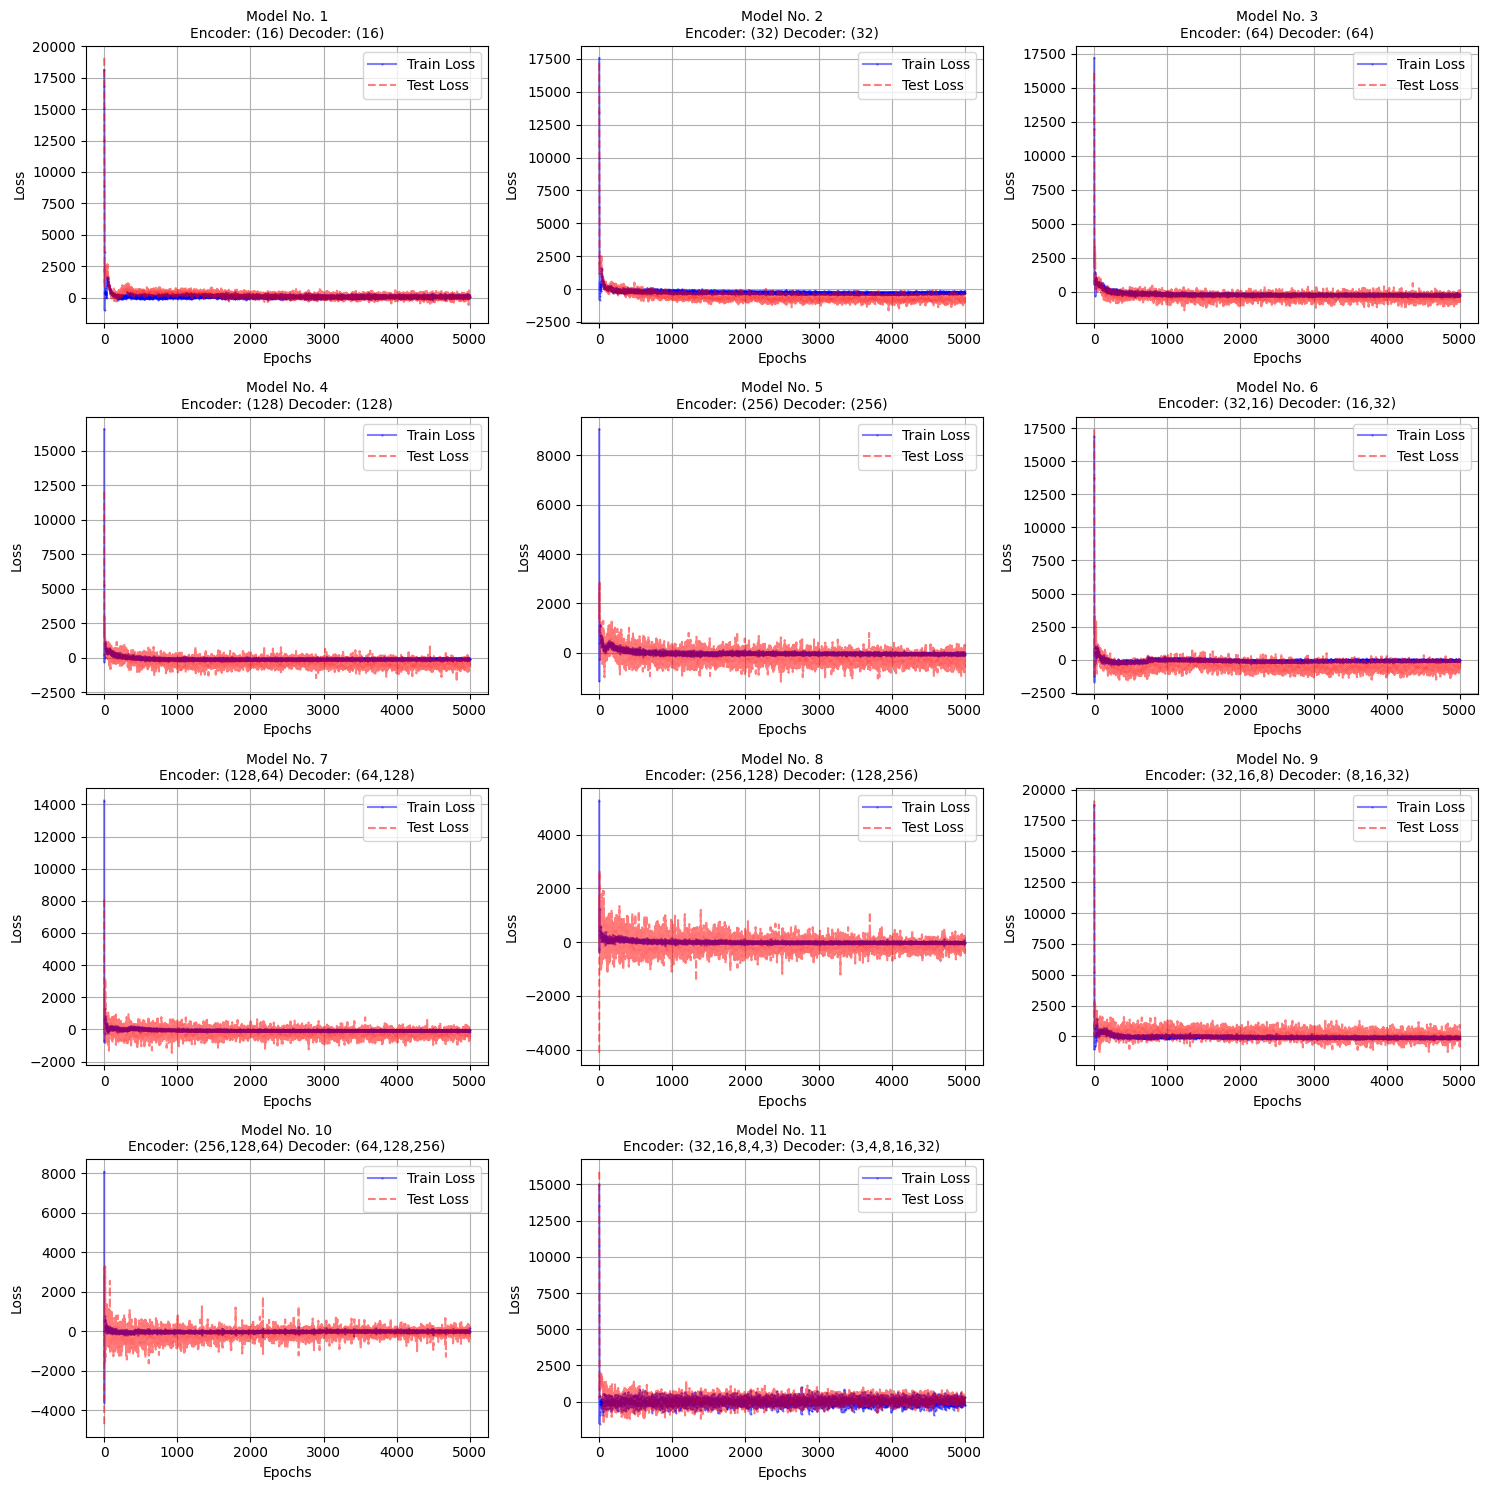

In [2]:
# Data path where output files are stored
data_path = "output_vae_full_weight"

# List all output files
files = [f for f in os.listdir(data_path) if f.startswith("output_file_vae") and f.endswith(".csv")]
sorted_files = []
for file in files:
    temp = file.split("batch")[0].split("Encoder")[1].split("_")
    temp = [i for i in temp if i!='']
    sorted_files.append((file, temp))

# Sort by the length of the second tuple and then lexicographically
sorted_files = sorted(sorted_files, key=lambda x: (len(x[1]), int(x[1][0])))

# Determine dynamic grid size
num_plots = min(len(sorted_files), 11)  # Limit to 11 plots if more exist
rows = math.ceil(math.sqrt(num_plots))  # Adjust for square layout
cols = math.ceil(num_plots / rows)  # Ensure all plots fit

fig, axes = plt.subplots(rows, cols, figsize=(15, 15))
axes = axes.flatten()  # Convert to 1D array for easy indexing

for idx, (file, encoder_structure) in enumerate(sorted_files[:num_plots]):
    file_path = os.path.join(data_path, file)
    encoder_design = "Encoder: (" + ",".join(map(str, encoder_structure)) + ")"
    decoder_design = "Decoder: (" + ",".join(map(str, encoder_structure[::-1])) + ")"
    architecture = encoder_design + " " + decoder_design

    try:
        # Load loss log
        df = pd.read_csv(file_path)

        # Ensure required columns exist
        if {"Epoch", "Train Loss", "Test Loss"}.issubset(df.columns):
            axes[idx].plot(df["Epoch"], df["Train Loss"], label="Train Loss", marker="o", linestyle="-", color="blue", markersize=0.5, alpha=0.5)
            axes[idx].plot(df["Epoch"], df["Test Loss"], label="Test Loss", marker=".", linestyle="--", color="red", markersize=0.1, alpha=0.5)

            # Graph labels
            axes[idx].set_xlabel("Epochs")
            axes[idx].set_ylabel("Loss")
            axes[idx].set_title(f"Model No. {idx+1}\n{architecture}", fontsize=10)
            axes[idx].legend()
            axes[idx].grid(True)
        else:
            axes[idx].set_title("Missing Columns")
            axes[idx].axis("off")

    except Exception as e:
        axes[idx].set_title("Error Loading File")
        axes[idx].axis("off")

# Hide any extra unused subplots
for ax in axes[num_plots:]:
    ax.axis("off")

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


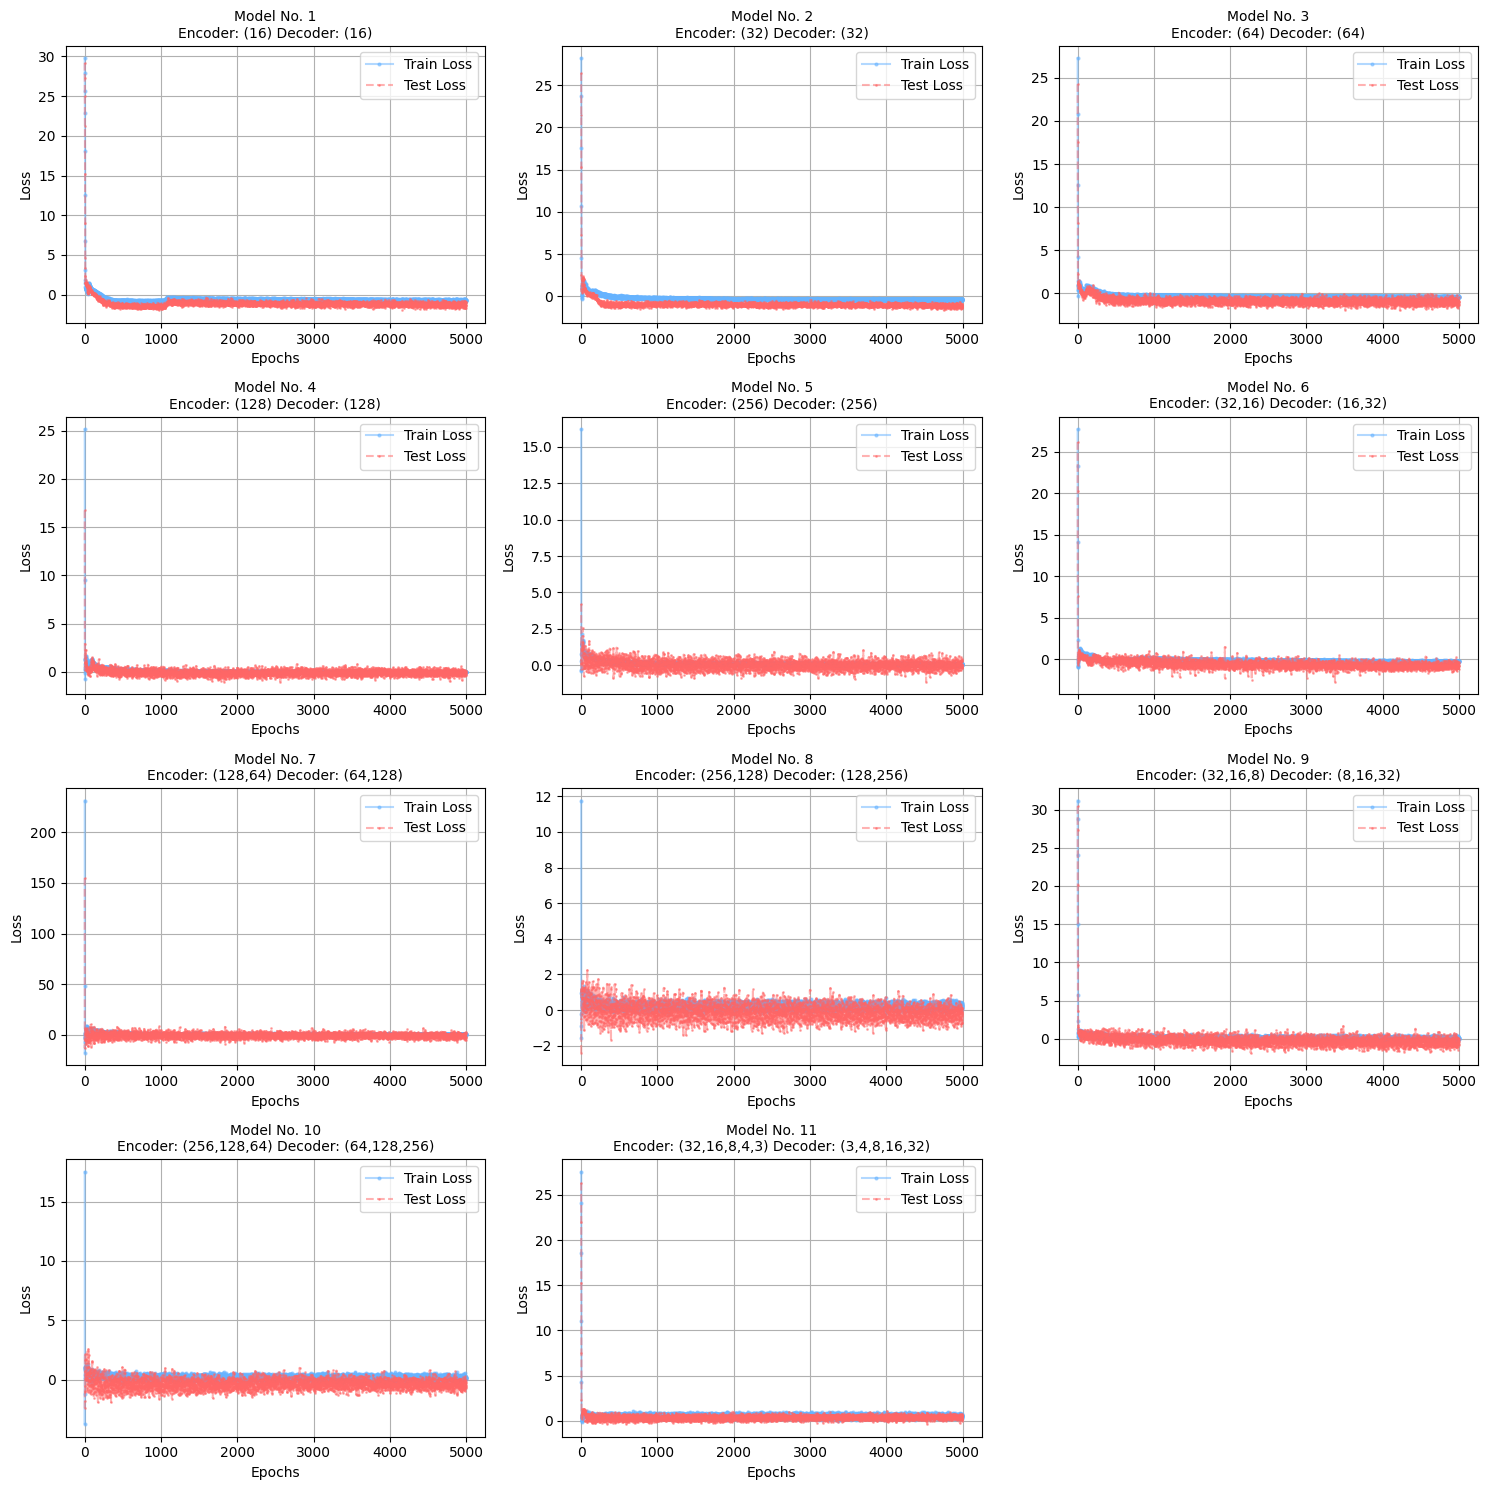

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import math
import os

# Data path where output files are stored
data_path = "output_vae2"

# List all output files
files = [f for f in os.listdir(data_path) if f.startswith("output_file_vae") and f.endswith(".csv")]
sorted_files = []
for file in files:
    temp = file.split("batch")[0].split("Encoder")[1].split("_")
    temp = [i for i in temp if i != '']
    sorted_files.append((file, temp))

# Sort by the length of the second tuple and then lexicographically
sorted_files = sorted(sorted_files, key=lambda x: (len(x[1]), int(x[1][0])))

# Determine dynamic grid size
num_plots = min(len(sorted_files), 11)  # Limit to 11 plots if more exist
rows = math.ceil(math.sqrt(num_plots))  # Adjust for square layout
cols = math.ceil(num_plots / rows)  # Ensure all plots fit

fig, axes = plt.subplots(rows, cols, figsize=(15, 15))
axes = axes.flatten()  # Convert to 1D array for easy indexing

for idx, (file, encoder_structure) in enumerate(sorted_files[:num_plots]):
    file_path = os.path.join(data_path, file)
    encoder_design = "Encoder: (" + ",".join(map(str, encoder_structure)) + ")"
    decoder_design = "Decoder: (" + ",".join(map(str, encoder_structure[::-1])) + ")"
    architecture = encoder_design + " " + decoder_design

    try:
        # Load loss log
        df = pd.read_csv(file_path)

        # Ensure required columns exist
        if {"Epoch", "Train Loss", "Test Loss"}.issubset(df.columns):
            train_loss = df["Train Loss"]
            test_loss = df["Test Loss"]

            # Plot train and test losses with specified colors and transparency (alpha)
            axes[idx].plot(df["Epoch"], train_loss, label="Train Loss", marker="o", linestyle="-", color="#66b3ff", markersize=2, alpha=0.5)
            axes[idx].plot(df["Epoch"], test_loss, label="Test Loss", marker=".", linestyle="--", color="#ff6666", markersize=2, alpha=0.5)

            # If the gap is too small, zoom in on the y-axis to make the difference more visible
            if (train_loss.max() - test_loss.max()) < 0.1:  # Check if the gap is very small
                axes[idx].set_ylim(min(min(train_loss), min(test_loss)) - 0.1, max(max(train_loss), max(test_loss)) + 0.1)


            # Graph labels and title
            axes[idx].set_xlabel("Epochs")
            axes[idx].set_ylabel("Loss")
            axes[idx].set_title(f"Model No. {idx+1}\n{architecture}", fontsize=10)
            axes[idx].legend()
            axes[idx].grid(True)
        else:
            axes[idx].set_title("Missing Columns")
            axes[idx].axis("off")

    except Exception as e:
        axes[idx].set_title("Error Loading File")
        axes[idx].axis("off")

# Hide any extra unused subplots
for ax in axes[num_plots:]:
    ax.axis("off")

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


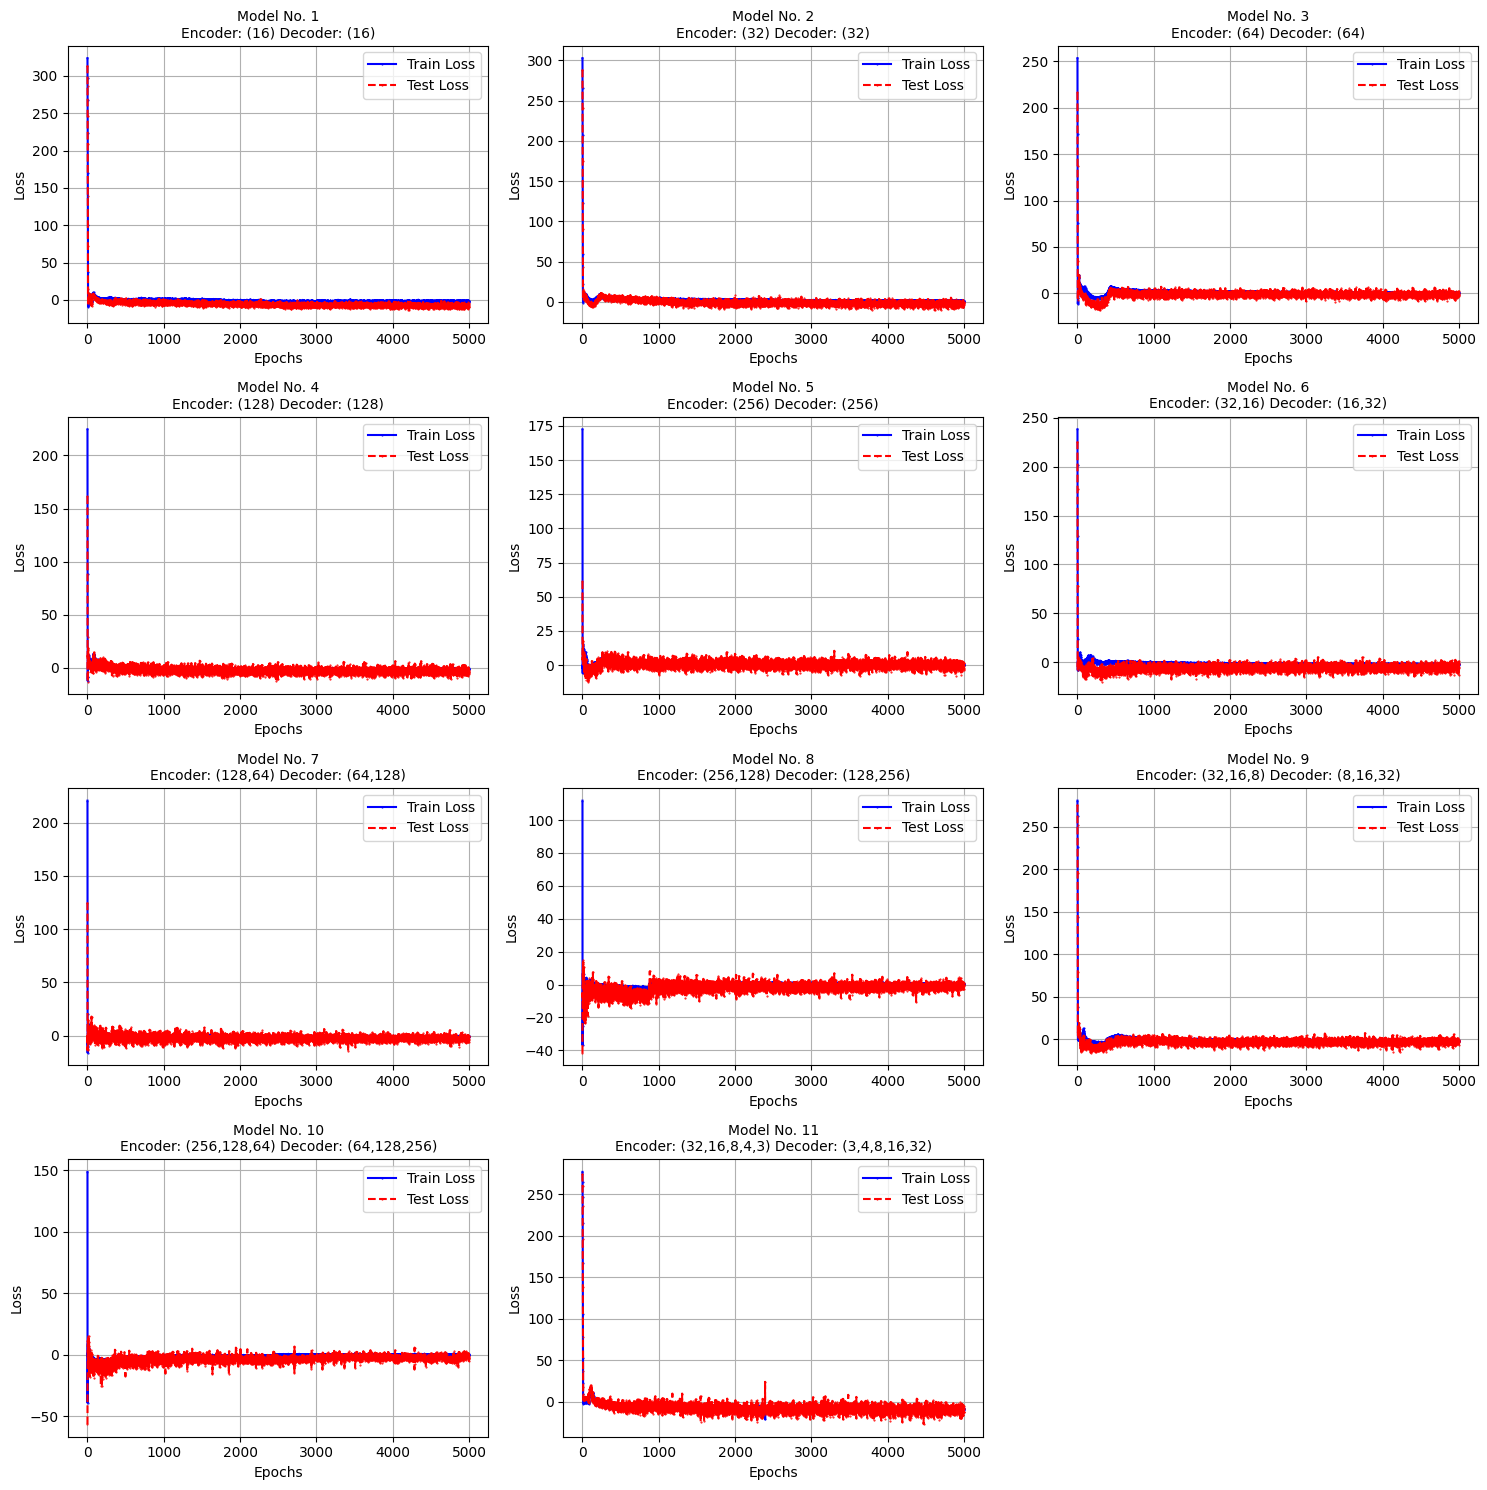

In [6]:
# Data path where output files are stored
data_path = "output_vae"

# List all output files
files = [f for f in os.listdir(data_path) if f.startswith("output_file_vae") and f.endswith(".csv")]
sorted_files = []
for file in files:
    temp = file.split("batch")[0].split("Encoder")[1].split("_")
    temp = [i for i in temp if i!='']
    sorted_files.append((file, temp))

# Sort by the length of the second tuple and then lexicographically
sorted_files = sorted(sorted_files, key=lambda x: (len(x[1]), int(x[1][0])))

# Determine dynamic grid size
num_plots = min(len(sorted_files), 11)  # Limit to 11 plots if more exist
rows = math.ceil(math.sqrt(num_plots))  # Adjust for square layout
cols = math.ceil(num_plots / rows)  # Ensure all plots fit

fig, axes = plt.subplots(rows, cols, figsize=(15, 15))
axes = axes.flatten()  # Convert to 1D array for easy indexing

for idx, (file, encoder_structure) in enumerate(sorted_files[:num_plots]):
    file_path = os.path.join(data_path, file)
    encoder_design = "Encoder: (" + ",".join(map(str, encoder_structure)) + ")"
    decoder_design = "Decoder: (" + ",".join(map(str, encoder_structure[::-1])) + ")"
    architecture = encoder_design + " " + decoder_design

    try:
        # Load loss log
        df = pd.read_csv(file_path)

        # Ensure required columns exist
        if {"Epoch", "Train Loss", "Test Loss"}.issubset(df.columns):
            axes[idx].plot(df["Epoch"], df["Train Loss"], label="Train Loss", marker="o", linestyle="-", color="blue", markersize=0.5)
            axes[idx].plot(df["Epoch"], df["Test Loss"], label="Test Loss", marker="o", linestyle="--", color="red", markersize=0.5)

            # Graph labels
            axes[idx].set_xlabel("Epochs")
            axes[idx].set_ylabel("Loss")
            axes[idx].set_title(f"Model No. {idx+1}\n{architecture}", fontsize=10)
            axes[idx].legend()
            axes[idx].grid(True)
        else:
            axes[idx].set_title("Missing Columns")
            axes[idx].axis("off")

    except Exception as e:
        axes[idx].set_title("Error Loading File")
        axes[idx].axis("off")

# Hide any extra unused subplots
for ax in axes[num_plots:]:
    ax.axis("off")

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()
